In [1]:
library(GLMsData)


In [2]:
data(nminer)

In [3]:
str(nminer)

'data.frame':	31 obs. of  8 variables:
 $ Miners : int  0 0 1 1 1 1 1 1 0 1 ...
 $ Eucs   : int  2 10 16 20 19 18 12 16 3 12 ...
 $ Area   : int  22 11 51 22 4 61 16 14 5 6 ...
 $ Grazed : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Shrubs : int  1 1 1 1 1 1 1 1 1 0 ...
 $ Bulokes: int  120 67 85 45 160 75 100 321 275 227 ...
 $ Timber : int  16 25 13 12 14 6 12 15 8 10 ...
 $ Minerab: int  0 0 3 2 8 1 8 5 0 4 ...


In [4]:
nm.m1 <- glm( Minerab ~ Eucs, data=nminer, family=poisson)

In [5]:
printCoefmat( coef( summary(nm.m1) ) )

             Estimate Std. Error z value  Pr(>|z|)    
(Intercept) -0.876211   0.282793 -3.0984  0.001946 ** 
Eucs         0.113981   0.012431  9.1691 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [6]:
confint(nm.m1)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-1.45700887,-0.3465538
Eucs,0.08985068,0.1386685


In [7]:
out <- predict( nm.m1, # The model used to predict
newdata=data.frame(Eucs=10), # New data for predicting
se.fit=TRUE)
out2 <- predict( nm.m1, newdata=data.frame(Eucs=10), se.fit=TRUE,
type="response")

In [8]:
c( exp( out$fit ), out2$fit )

1       1 
1.30161 1.30161

In [9]:
zstar <- qnorm(p=0.975) 
ci.lo <- exp( out$fit - zstar*out$se.fit)
ci.hi <- exp( out$fit + zstar*out$se.fit)

In [10]:
c( Lower=ci.lo, Estimate=exp(out$fit), Upper=ci.hi)

Lower.1 Estimate.1    Upper.1 
  0.924013   1.301610   1.833512

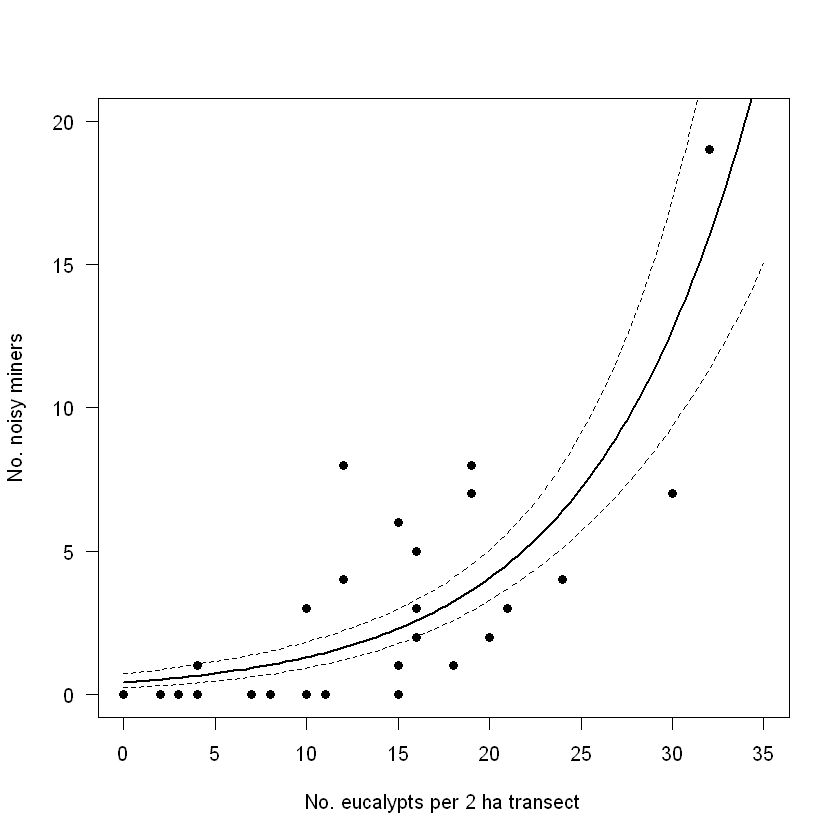

In [11]:
newEucs <- seq(0, 35, length=100)
newMab <- predict( nm.m1, se.fit=TRUE, newdata=data.frame(Eucs=newEucs))
ci.lo <- exp(newMab$fit-zstar*newMab$se.fit)
ci.hi <- exp(newMab$fit+zstar*newMab$se.fit)
plot( Minerab~Eucs, data=nminer,
xlim=c(0, 35), ylim=c(0, 20), las=1, pch=19,
xlab="No. eucalypts per 2 ha transect", ylab="No. noisy miners")
lines(exp(newMab$fit) ~ newEucs, lwd=2)
lines(ci.lo ~ newEucs, lty=2); lines(ci.hi ~ newEucs, lty=2)

In [12]:
nm.m0 <- glm( Minerab ~ 1, data=nminer, family=poisson)
nm.m1 <- glm( Minerab ~ Eucs, data=nminer, family=poisson)

In [13]:
coef(summary(nm.m0))
coef(summary(nm.m1))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),0.9968296,0.1091089,9.136095,6.474844e-20


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.8762114,0.28279293,-3.098421,1.945551e-03
Eucs,0.1139813,0.01243104,9.169092,4.770189e-20


In [14]:
c( "Dev(m0)"= deviance( nm.m0 ), "Dev(m1)" = deviance( nm.m1 ) )

Dev(m0)   Dev(m1) 
150.54532  63.31798

In [15]:
c( "df(m0)" = df.residual( nm.m0 ), "df(m1)" = df.residual( nm.m1 ) )

df(m0) df(m1) 
    30     29

In [16]:
L <- deviance( nm.m0 ) - deviance( nm.m1 ); L

[1] 87.22735

In [17]:
pchisq(L, df.residual(nm.m0) - df.residual(nm.m1), lower.tail=FALSE )

[1] 9.673697e-21

In [18]:
library(statmod)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [19]:
nm.m0 <- glm( Minerab ~ 1, data=nminer, family=poisson)

In [20]:
z.stat <- glm.scoretest(nm.m0, nminer$Eucs)
p.val <- 2 * pnorm( abs(z.stat), lower.tail=FALSE)
round( c(score.stat=z.stat, P=p.val), 4)

score.stat          P 
    9.7565     0.0000

In [21]:
Y <- matrix(c(10,20,20,10),2,2)
rownames(Y) <- c("A1","A2")
colnames(Y) <- c("B1","B2")

In [22]:
Y

,B1,B2
A1,10,20
A2,20,10


In [23]:
chisq.test(Y, correct=FALSE)$p.value

[1] 0.009823275

In [24]:
y <- as.vector(Y)
A <- factor(c(1,2,1,2))
B <- factor(c(1,1,2,2))
fit <- glm(y~A+B, family=poisson)
z.stat <- glm.scoretest(fit, x2=c(0,0,0,1))
2 * pnorm( -abs(z.stat) )

[1] 0.009823231

In [25]:
y <- c(0, 0, 0, 1, 0, 1, 1, 1, 1)
x <- 1:9
fit <- glm(y~x, family=binomial)

In [26]:
wilcox.test(x ~ y)$p.value

[1] 0.03174603

In [27]:
coef(summary(fit))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-5.811289,4.0019503,-1.452114,0.1464699
x,1.292257,0.8497008,1.520838,0.1283006


In [28]:
as.data.frame(anova(fit, test="Chisq")[2,])

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
x,1,7.353132,7,5.012176,0.006694603


In [29]:
anova(fit, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,8,12.365308,NA
x,1,7.353132,7,5.012176,0.006694603


In [30]:
fit <- glm(y~1, family=binomial)

In [31]:
2 * pnorm(-abs(glm.scoretest(fit, x)))

[1] 0.01937237

In [32]:
y <- c(15, 26, 4)
x <- c(1/4, 1/2, 1/4)
chisq.test(x=y, p=x)


	Chi-squared test for given probabilities

data:  y
X-squared = 6.4667, df = 2, p-value = 0.03943


In [33]:
fit <- glm( y ~ 0+x, family=poisson)

In [34]:
pearson.gof <- sum(fit$weights * fit$residuals^2)
tab <- data.frame(GoF.Statistic=c(fit$deviance, pearson.gof))
tab$DF <- rep(fit$df.residual, 2)
tab$P.Value <- pchisq(tab$GoF, df=tab$DF, lower.tail=FALSE)
row.names(tab) <- c("Deviance", "Pearson"); print(tab, digits=3)

         GoF.Statistic DF P.Value
Deviance          12.2  2 0.00227
Pearson           17.5  2 0.00016


In [35]:
data(trees)
tr.m2 <- glm( Volume ~ log(Girth) + log(Height),
family=Gamma(link="log"), data=trees )
printCoefmat(coef(summary(tr.m2)))

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -6.69111    0.78784 -8.4929 3.108e-09 ***
log(Girth)   1.98041    0.07389 26.8021 < 2.2e-16 ***
log(Height)  1.13288    0.20138  5.6255 5.037e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [36]:
phi.meandev <- deviance(tr.m2) / df.residual(tr.m2)
phi.pearson <- sum(tr.m2$weights * tr.m2$residuals^2) / df.residual(tr.m2)

phi.meandev
phi.pearson
summary(tr.m2)$dispersion

[1] 0.006554117

[1] 0.006427286

[1] 0.006427286

In [37]:
printCoefmat(coef(summary(tr.m2, dispersion=phi.meandev)))

             Estimate Std. Error z value  Pr(>|z|)    
(Intercept) -6.691109   0.795578 -8.4104 < 2.2e-16 ***
log(Girth)   1.980412   0.074616 26.5415 < 2.2e-16 ***
log(Height)  1.132878   0.203361  5.5708 2.536e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [38]:
printCoefmat(coef(summary(tr.m2, dispersion=phi.pearson)))

            Estimate Std. Error z value  Pr(>|z|)    
(Intercept) -6.69111    0.78784 -8.4929 < 2.2e-16 ***
log(Girth)   1.98041    0.07389 26.8021 < 2.2e-16 ***
log(Height)  1.13288    0.20138  5.6255  1.85e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [39]:
beta0.hat <- coef(summary(tr.m2))[1,"Estimate"]
beta0.se <- coef(summary(tr.m2))[1,"Std. Error"]
beta0.cone <- log( pi/1728 )
t1 <- ( beta0.hat - beta0.cone ) / beta0.se
beta0.cylinder <- log( pi/576 )
t2 <- ( beta0.hat - beta0.cylinder ) / beta0.se
p1 <- 2 * pt( -abs(t1), df=df.residual(tr.m2) )
p2 <- 2 * pt( -abs(t2), df=df.residual(tr.m2) )
tab <- array( c(t1, t2, p1, p2), dim=c(2, 2))
rownames(tab) <- c("Cone:","Cylinder:")
colnames(tab) <- c("t-scores","P-values");
tab

,t-scores,P-values
Cone:,-0.483750,0.63232520
Cylinder:,-1.878206,0.07080348


In [40]:
confint(tr.m2)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-8.2358004,-5.139294
log(Girth),1.8359439,2.124974
log(Height),0.7364235,1.528266


In [41]:
out <- predict( tr.m2, newdata=data.frame(Height=70, Girth=15),
se.fit=TRUE)

In [42]:
tstar <- qt(p=0.975, df=df.residual(tr.m2)) # For 95% CI
ci.lo <- exp(out$fit - tstar*out$se.fit)
ci.hi <- exp(out$fit + tstar*out$se.fit)
c( Lower=ci.lo, Estimate=exp(out$fit), Upper=ci.hi)

Lower.1 Estimate.1    Upper.1 
  30.81902   32.62157   34.52955

In [43]:
newHt <- seq(min(trees$Height), max(trees$Height), by=4)

In [44]:
newVol <- predict( tr.m2, se.fit=TRUE,
newdata=data.frame(Height=newHt, Girth=15))

In [45]:
ci.lo <- exp(newVol$fit-tstar*newVol$se.fit)
ci.hi <- exp(newVol$fit+tstar*newVol$se.fit)
cbind( newHt, ci.lo, Vol=exp(newVol$fit), ci.hi, width=ci.hi - ci.lo)

newHt,ci.lo,Vol,ci.hi,width
63,26.33168,28.95124,31.83141,5.499733
67,28.88896,31.04230,33.35614,4.467187
71,31.45834,33.15002,34.93267,3.474330
75,33.93192,35.27358,36.66829,2.736366
79,36.10127,37.41225,38.77084,2.669571
83,37.87594,39.56537,41.33016,3.454225
87,39.40973,41.73232,44.19180,4.782065


In [46]:
data(trees)
tr.m0 <- glm( Volume ~ 1, family=Gamma(link="log"), data=trees)
tr.m1 <- update(tr.m0, . ~ . + log(Girth) )
tr.m2 <- update(tr.m1, . ~ . + log(Height) )
c( deviance(tr.m0), deviance(tr.m1), deviance(tr.m2) )
c( df.residual(tr.m0), df.residual(tr.m1), df.residual(tr.m2) )

[1] 8.3172012 0.3840839 0.1835153

[1] 30 29 28

In [47]:
dev1 <- deviance(tr.m0) - deviance(tr.m1)
dev2 <- deviance(tr.m1) - deviance(tr.m2)
df1 <- df.residual(tr.m0) - df.residual(tr.m1)
df2 <- df.residual(tr.m1) - df.residual(tr.m2)
c( dev1, dev2)

[1] 7.9331173 0.2005686

In [48]:
phi.meandev <- deviance(tr.m2) / df.residual(tr.m2)
phi.Pearson <- summary(tr.m2)$dispersion
c("Mean deviance" = phi.meandev, "Pearson" = phi.Pearson )

Mean deviance       Pearson 
  0.006554117   0.006427286

In [49]:
F.Pearson <- c( dev1/df1, dev2/df2 ) / phi.Pearson
F.meandev <- c( dev1/df1, dev2/df2 ) / phi.meandev
P.Pearson <- pf( F.Pearson, df1, df.residual(tr.m2), lower.tail=FALSE )
P.meandev <- pf( F.meandev, df2, df.residual(tr.m2), lower.tail=FALSE )
tab <- data.frame(F.Pearson, P.Pearson, F.meandev, P.meandev)
rownames(tab) <- c("Girth","Height")
print(tab, digits=3)

       F.Pearson P.Pearson F.meandev P.meandev
Girth     1234.3  1.05e-24    1210.4  1.38e-24
Height      31.2  5.60e-06      30.6  6.50e-06


In [50]:
anova(tr.m2)

,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,30,8.3172012
log(Girth),1,7.9331173,29,0.3840839
log(Height),1,0.2005686,28,0.1835153


In [51]:
data(trees)
tr.m2 <- glm( Volume ~ log(Girth) + log(Height),
family=Gamma(link="log"), data=trees )
printCoefmat(coef(summary(tr.m2)))

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -6.69111    0.78784 -8.4929 3.108e-09 ***
log(Girth)   1.98041    0.07389 26.8021 < 2.2e-16 ***
log(Height)  1.13288    0.20138  5.6255 5.037e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [52]:
phi.meandev <- deviance(tr.m2) / df.residual(tr.m2)
phi.pearson <- summary(tr.m2)$dispersion
c(Mean.deviance=phi.meandev, Pearson=phi.pearson)

Mean.deviance       Pearson 
  0.006554117   0.006427286

In [53]:
printCoefmat(coef(summary(tr.m2, dispersion=phi.meandev)))

             Estimate Std. Error z value  Pr(>|z|)    
(Intercept) -6.691109   0.795578 -8.4104 < 2.2e-16 ***
log(Girth)   1.980412   0.074616 26.5415 < 2.2e-16 ***
log(Height)  1.132878   0.203361  5.5708 2.536e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [54]:
beta0.hat <- coef(summary(tr.m2))[1,"Estimate"]
beta0.se <- coef(summary(tr.m2))[1,"Std. Error"]
beta0.cone <- log( pi/1728 )
t1 <- ( beta0.hat - beta0.cone ) / beta0.se
beta0.cylinder <- log( pi/576 )
t2 <- ( beta0.hat - beta0.cylinder ) / beta0.se
p1 <- 2 * pt( -abs(t1), df=df.residual(tr.m2) )
p2 <- 2 * pt( -abs(t2), df=df.residual(tr.m2) )
tab <- array( c(t1, t2, p1, p2), dim=c(2, 2))
rownames(tab) <- c("Cone:","Cylinder:")
colnames(tab) <- c("t-scores","P-values"); tab

,t-scores,P-values
Cone:,-0.483750,0.63232520
Cylinder:,-1.878206,0.07080348


In [55]:
confint(tr.m2)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-8.2358004,-5.139294
log(Girth),1.8359439,2.124974
log(Height),0.7364235,1.528266


In [56]:
out <- predict( tr.m2, newdata=data.frame(Height=70, Girth=15),
se.fit=TRUE)

In [57]:
tstar <- qt(p=0.975, df=df.residual(tr.m2)) # For 95% CI
ci.lo <- exp(out$fit - tstar*out$se.fit)
ci.hi <- exp(out$fit + tstar*out$se.fit)
c( Lower=ci.lo, Estimate=exp(out$fit), Upper=ci.hi)

Lower.1 Estimate.1    Upper.1 
  30.81902   32.62157   34.52955

In [58]:
newHt <- seq(min(trees$Height), max(trees$Height), by=4)
newVol <- predict( tr.m2, se.fit=TRUE,
newdata=data.frame(Height=newHt, Girth=15))
ci.lo <- exp(newVol$fit-tstar*newVol$se.fit)
ci.hi <- exp(newVol$fit+tstar*newVol$se.fit)
cbind( newHt, ci.lo, Vol=exp(newVol$fit), ci.hi, width=ci.hi - ci.lo)

newHt,ci.lo,Vol,ci.hi,width
63,26.33168,28.95124,31.83141,5.499733
67,28.88896,31.04230,33.35614,4.467187
71,31.45834,33.15002,34.93267,3.474330
75,33.93192,35.27358,36.66829,2.736366
79,36.10127,37.41225,38.77084,2.669571
83,37.87594,39.56537,41.33016,3.454225
87,39.40973,41.73232,44.19180,4.782065


In [59]:
data(trees)
tr.m0 <- glm( Volume ~ 1, family=Gamma(link="log"), data=trees)
tr.m1 <- update(tr.m0, . ~ . + log(Girth) )
tr.m2 <- update(tr.m1, . ~ . + log(Height) )
c( deviance(tr.m0), deviance(tr.m1), deviance(tr.m2) )
c( df.residual(tr.m0), df.residual(tr.m1), df.residual(tr.m2) )

[1] 8.3172012 0.3840839 0.1835153

[1] 30 29 28

In [60]:
dev1 <- deviance(tr.m0) - deviance(tr.m1)
dev2 <- deviance(tr.m1) - deviance(tr.m2)
df1 <- df.residual(tr.m0) - df.residual(tr.m1)
df2 <- df.residual(tr.m1) - df.residual(tr.m2)
c( dev1, dev2)
c( df1, df2)

[1] 7.9331173 0.2005686

[1] 1 1

In [61]:
phi.meandev <- deviance(tr.m2) / df.residual(tr.m2) # Mean dev.
phi.Pearson <- summary(tr.m2)$dispersion # Pearson
c("Mean deviance" = phi.meandev, "Pearson" = phi.Pearson )

Mean deviance       Pearson 
  0.006554117   0.006427286

In [62]:
F.Pearson <- c( dev1/df1, dev2/df2 ) / phi.Pearson
F.meandev <- c( dev1/df1, dev2/df2 ) / phi.meandev
P.Pearson <- pf( F.Pearson, df1, df.residual(tr.m2), lower.tail=FALSE )
P.meandev <- pf( F.meandev, df2, df.residual(tr.m2), lower.tail=FALSE )
tab <- data.frame(F.Pearson, P.Pearson, F.meandev, P.meandev)
rownames(tab) <- c("Girth","Height")
print(tab, digits=3)

       F.Pearson P.Pearson F.meandev P.meandev
Girth     1234.3  1.05e-24    1210.4  1.38e-24
Height      31.2  5.60e-06      30.6  6.50e-06


In [63]:
anova(tr.m2, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,30,8.3172012,NA,NA
log(Girth),1,7.9331173,29,0.3840839,1234.2873,1.054447e-24
log(Height),1,0.2005686,28,0.1835153,31.2058,5.603663e-06


In [64]:
phi.meandev <- deviance( tr.m2) / df.residual(tr.m2)
anova(tr.m2, test="F", dispersion=phi.meandev)

Warning message in anova.glm(tr.m2, test = "F", dispersion = phi.meandev):
"using F test with a fixed dispersion is inappropriate"

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,30,8.3172012,NA,NA
log(Girth),1,7.9331173,29,0.3840839,1210.40223,3.346664e-265
log(Height),1,0.2005686,28,0.1835153,30.60193,3.167787e-08


In [65]:
tr.rev <- glm( Volume ~ log(Height) + log(Girth),
family=Gamma(link="log"), data=trees)

In [66]:
anova(tr.rev, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,30,8.3172012,NA,NA
log(Height),1,3.534486,29,4.7827152,549.9189,6.006342e-20
log(Girth),1,4.599200,28,0.1835153,715.5742,1.753583e-21


In [67]:
library(statmod)
mA <- glm( Volume ~ log(Girth), family=Gamma(link="log"), data=trees )
t.Ht <- glm.scoretest( mA, log(trees$Height) )
p.Ht <- 2 * pt( -abs(t.Ht), df=df.residual(mA) ) # Two-tailed P-value
tab <- data.frame(Score.stat = t.Ht, P.Value=p.Ht )
print(tab, digits=3)

  Score.stat P.Value
1       3.83 0.00063


In [68]:
mB <- glm( Volume ~ log(Height), family=Gamma(link="log"), data=trees)
t.Girth<- glm.scoretest( mB, log(trees$Girth) )
p.Girth <- 2 * pt( -abs(t.Girth), df=df.residual(mB) )
tab <- data.frame(Score.stat = t.Girth, P.Value=p.Girth )
print(tab, digits=3)

  Score.stat  P.Value
1       5.22 1.36e-05


In [69]:
tr.aic1 <- glm( Volume ~ offset(2*log(Girth)) + log(Height),
family=Gamma(link="log"), data=trees)
tr.aic2 <- glm( Volume ~ log(Girth) + offset(log(Height)),
family=Gamma(link="log"), data=trees)

In [70]:
c(extractAIC(tr.aic1), extractAIC(tr.aic2))
c( AIC(tr.aic1), AIC(tr.aic2))

[1]   2.0000 137.9780   2.0000 138.3677

[1] 137.9780 138.3677

In [71]:
min.model <- glm( Volume~1, data=trees, family=Gamma(link="log"))

In [72]:
coef(summary(min.model))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.40688,0.09785315,34.81625,8.106441e-26


In [73]:
max.model <- glm( Volume~log(Girth) + log(Height),
data=trees, family=Gamma(link="log"))

In [74]:
coef(summary(max.model))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-6.691109,0.78784281,-8.492949,3.108495e-09
log(Girth),1.980412,0.07389014,26.802119,1.664227e-21
log(Height),1.132878,0.20138327,5.625483,5.036791e-06


In [75]:
med.model <- glm(Volume ~ 0 + log(Girth) + log(Height),
data=trees, family=Gamma(link="log"))

In [77]:
m.f <- step( min.model, scope=list(lower=min.model, upper=max.model),
direction="backward")

Start:  AIC=255.48
Volume ~ 1



In [78]:
m.b <- step( max.model, scope=list(lower=min.model, upper=max.model),
direction="backward")

Start:  AIC=139.9
Volume ~ log(Girth) + log(Height)

              Df Deviance    AIC
<none>             0.1835 139.90
- log(Height)  1   0.3841 169.11
- log(Girth)   1   4.7827 853.48


In [79]:
m.s <- step( min.model, scope=list(lower=min.model, upper=max.model),
direction="both")

Start:  AIC=255.48
Volume ~ 1

              Df Deviance    AIC
+ log(Girth)   1   0.3841 230.75
+ log(Height)  1   4.7827 245.57
<none>             8.3172 255.48

Step:  AIC=160.83
Volume ~ log(Girth)

              Df Deviance    AIC
+ log(Height)  1   0.1835 147.82
<none>             0.3841 160.83
- log(Girth)   1   8.3172 752.55

Step:  AIC=139.9
Volume ~ log(Girth) + log(Height)

              Df Deviance    AIC
<none>             0.1835 139.90
- log(Height)  1   0.3841 169.11
- log(Girth)   1   4.7827 853.48
